<center><img src='https://drive.google.com/uc?id=1PioHCAlQTt8LWChoMysPErSOrxOfAW0R'></center>

**AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020**

---
<center>
<h1>Przetwarzanie multimediów w systemach decyzyjnych,</br>Informatyka</br>specjalność: uczenie maszynowe

Autor: Przemysław Rośleń</br>

</br>

14 października 2021
</center>
<h3>Uczenie wielozadaniowe w widzeniu komputerowym, cz. 1</h2>



# Wprowadzenie

**Uczenie wielozadaniowe** to scenariusz, w którym model uczony jest więcej niż jednego zadania, spośród typowych celów, stawianych algorytmom uczenia maszynowego. Przykładowo, jedna, odpowiednio rozbudowana architektura sieci realizować może **jednocześnie** klasyfikację obiektów, lokalizację obiektów w obrazie, deskrypcję semantyczną treści obrazu, wymagającą rozumienia kontekstu, wydobywanie nowych informacji liczbowych np. wzrost w metrach na podstawie ujęcia (regresja), transformację sekwencji.

Takie zadania realizowane są typowo przez wiele osobnych modeli, jednakże integracja ich w jeden, wielozadaniowy model ma na celu zwiększyć:
- wydajność – uzyskiwane jest to poprzez współdzielenie warstw (patrz: zagadnienia uczenia on-line, dodawania kolejnych klas i zagadnień do gotowej architektury, sem. 1., specjalność: uczenie maszynowe, przedmiot: metody sztucznej inteligencji)
- zdolności generalizacji - współdzielone warstwy potencjalnie lepiej wyuczą się ekstrakcji znaczących cech, gdy cała architektura uczona będzie realizacji wielu zadań.

## Uczenie wielozadaniowe w widzeniu komputerowym - przykłady zastosowań

Dla dziedziny analizy obrazu uczenie wielozadaniowe może prowadzić do:
- Segmentacji sceny (na wyjściu wszystkie piksele obrazu otrzymują odmienne wartości-etykiety każdego obiektu)
- Lokalizacji obiektów (na wyjściu położenie ramki „bounding-box”, każdego obiektu)
- Klasyfikacji obiektów (na wyjściu etykieta klasy, każdego obiektu)
- Klasyfikacji sceny (na wyjściu etykieta klasy, całego zdjęcia)

## Współdzielenie warstw a wydajność

W wielu przypadkach decyzje dotyczące architektury modelu podyktowane muszą być kompromisem między wydajnością a dokładnością działania.

Współdzielone warstwy są tylko raz trenowane i uruchamiane na etapie wnioskowania. Jeśli będzie ich odpowiednio duży odsetek (współdzielonych  w proporcji do wszystkich) to model działać będzie wydajniej niż dwa osobne modele "jednozadaniowe".

Liczba wspólnych warstw, głębokość na której są ułożone i na której następuje rozdzielenie na gałęzie dedykowane osobnym zadaniom to hiperparametry, które regulowane być powinny w celu optymalizacji wydajności. W praktyce hiperparametry zależne będą od podobieństw między realizowanymi jednocześnie zadaniami.


## Funkcje strat w uczeniu wielozadaniowym

Cele jednocześnie realizowanych zadań mogą być odmienne i dlatego w ogólności funkcje straty dla każdego zadania mogą przyjąć inną, adekwatną do niego postać.

Wyniki `loss` należy poddać złączeniu w pojedynczy, całościowy wynik, użyteczny w procesie treningu. Złączenie może polegać na wyliczeniu sumy ważonej składowych `loss`. Optymalizacja hiperpametrów modelu obejmować może w takim przypadku także uczenie wag dla sumowania osobnych `loss`.

## Przykłady z literatury

**Architektury uczenia wielozadaniowego**

- Misra, et al., *Cross-stitch networks for multi-task learning*.
CVPR 2016

- Isikdogan L, et al., *SemifreddoNets; partially frozen neural networks for efficient computer vision systems*

**Strategie uczenia**

- Standley T, et al., *Which Tasks Should Be Learned Together in Multi-task Learning?*

Aktualizacje dla jednych zadań mogą zakłócać uczenie innych zadań (ang. Negative Transfer).

**Strategie doboru wag składowych dla funkcji loss**

- Kendall et al., *Multi-Task Learning Using Uncertainty to Weigh Losses for Scene Geometry and Semantics*, https://arxiv.org/pdf/1705.07115.pdf
- Chen et al., *GradNorm: Gradient Normalization for Adaptive Loss Balancing in Deep Multitask Networks*, https://arxiv.org/pdf/1711.02257.pdf



# Cele ćwiczenia laboratoryjnego

Zadanie polega na realizacji kroków:

1. przygotowanie 2 architektur realizujących klasyfikację obrazów ze zbioru MNIST: fully connected dla 10 cyfr, fully connected dla 3 klas (wyników dzielenia modulo 3).
1. pomiar czasu klasyfikacji
1. zapoznanie się z zasadą budowania złożonych architektur sieci
1. przygotowanie architektury do jednoczesnej klasyfikacji wielozadaniowej dla 10 cyfr oraz dla 3 klas (liczba modulo 3)
1. pomiar czasu klasyfikacji
1. próba optymalizacji architektury poprzez dobór rozmiaru części współdzielonej i części dedykowanych (pomiary czasów obliczeń, obserwacja obu wyników accuracy dla klas).

Następnie zadania powyższe powtarzane są dla architektur z warstwami splotowymi.

# Przygotowanie środowiska

Zaimportowane zostają wymagane biblioteki.

In [ ]:
import numpy as np                   # obliczenia
import matplotlib.pyplot as plt      # wykresy
import random                        # generowanie liczb losowych

from keras.datasets import mnist     # MNIST dataset
from keras.models import Sequential  # Architektura sieci neuronowej - jednokierunkowa

from keras.layers import Dense, Dropout, Activation # Warstwy sieci
import keras.utils as np_utils                         # narzędzia NumPy
from keras.utils import plot_model             # wizualizacja

import tensorflow as tf                 # TF
from tensorflow import keras            # Keras
from tensorflow.keras import layers     # Warstwy sieci

## Wczytanie danych

Zbiór MNIST jest dostępny wprost z poziomu biblioteki Keras.

In [ ]:
# MNIST to 60000 obrazów do uczenia i 10000 do testu.
# Przedstawiają cyfry pisma odręcznego, rozmiar 28·28 pikseli, jeden kanał koloru, skala szarości

print("Rozmiar danych:")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

Rozmiar danych:
11490434/11490434 [==============================] - 2s 0us/step
X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


Przykłady ze zbioru uczącego (losowy wybór, można wykonać wielokrotnie).

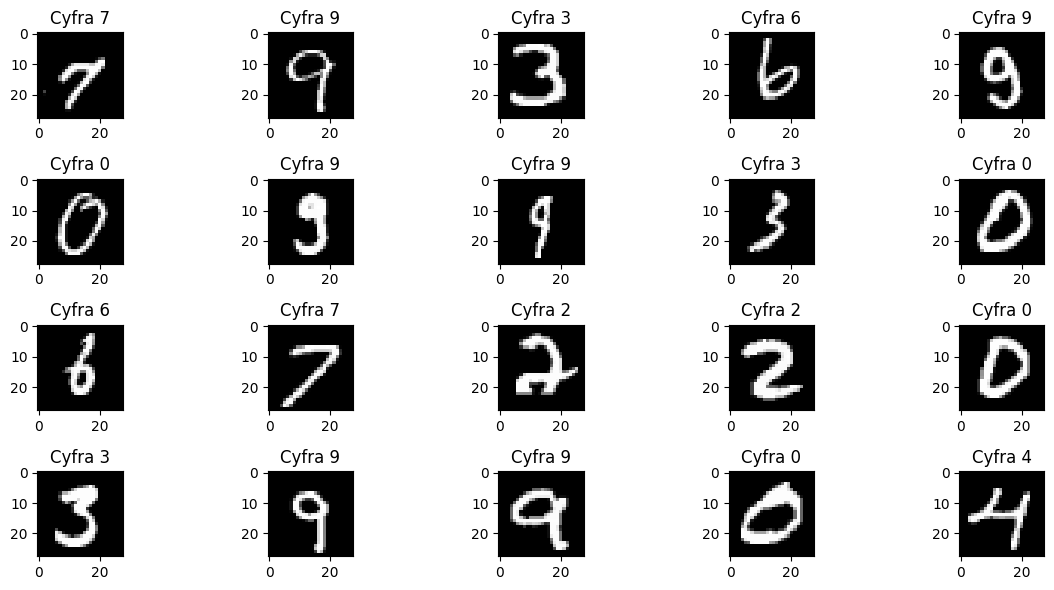

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)

for i in range(20):
    plt.subplot(4,5,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Cyfra {}".format(y_train[num]))

plt.tight_layout()

# Sieć wielowarstwowa - klasyfikacja cyfr do 10 klas

Dane wejściowe są wstępnie przetworzone: cyfra jest wyśrodkowana, o dość stałej wysokości, kontrastująca z tłem. Z tego powodu nie ma uzasadnienia dla stosowania warstw splotowych w sieci neuronowej - rozpoznanie takich obrazów bazować może na stwierdzaniu występowania białych pikseli w odpowiednich miejscach (właściwie: zbiorów pikseli jednocześnie występujących w określonych miejscach, silnie związanych z klasą obrazu, czyli kształtem cyfry).

Sieć przyjmować będzie na wejście wektor wszystkich pikseli 28·28=784. Dane wejściowe wymagają zmiany kształtu - operacja reshape(), (ang. flattening).

In [ ]:
X_train = X_train.reshape(60000, 784) # zmiana na dane dwuwymiarowe, 60000 przykładów, 784 próbki każdy.
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')   # przed normalizacją (dzieleniem przez wartość maksymalną)
X_test = X_test.astype('float32')

X_train /= 255                        # każdy piksel ma teraz wartość od 0 do 1
X_test /= 255

## Inicjalizacja modelu sieci jednokierunkowej

Zbudowana zostaje prosta trójwarstwowa sieć neuronowa, o w pełni połączonych warstwach (ang. *fully connected*). Z wykorzystaniem biblioteki `Keras` sprowadza się to do kilku poleceń z modułu layers.

In [ ]:
inputs = keras.Input(shape=(784,))      # warstwa wejściowa

x = layers.Dense(64, activation="relu")(inputs) # warstwa ukryta
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu")(x)      # warstwa ukryta
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10, name="output")(x)    # wyjście
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model") # dobrą praktyką jest nazywać - warstwy i model

## Wizualizacja modelu

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 48)                37680     
                                                                 
 dropout_8 (Dropout)         (None, 48)                0         
                                                                 
 output (Dense)              (None, 3)                 147       
                                                                 
Total params: 37827 (147.76 KB)
Trainable params: 37827 (147.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


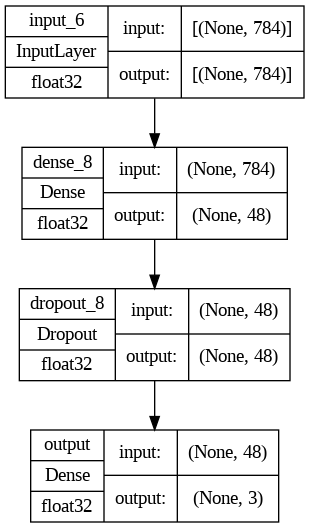

In [ ]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True,
           show_dtype=True)

## Wczytanie danych

Jeśli zajdzie potrzeba, to zastosować można poniższy, krótki blok kodu, ponownie wczytujący, zmieniający kształt i normalizujący dane.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

## Kompilacja i trening modelu

Biblioteka Keras oferuje operację kompilowania modelu do postaci wykonywalnego grafu obliczeniowego, redukując w ten sposób narzuty związane z działaniem interpretera języka Python. Skompilowany model dzięki temu może wydajnie działać na CPU i GPU.

W trakcie kompilacji zadać należy funkcje straty i algorytm optymalizacji.

Przykładowa kros-entropia służy do pomiaru różnicy między docelowym prawdopodobieństwem, a otrzymanym prawdopodobieństwem dla wszystkich klas wyjściowych. Obliczana jest miara różnicy między rozkładem pożądanym: dana klasa 100% i każda inna klasa 0% a rozkładem zwróconym przez sieć, np. dana klasa 75%, inne klasy po 0-5%.


In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 4s 4ms/step - loss: 0.1300 - accuracy: 0.9622 - val_loss: 0.1100 - val_accuracy: 0.9710
Epoch 2/2
750/750 [==============================] - 3s 4ms/step - loss: 0.1233 - accuracy: 0.9647 - val_loss: 0.1069 - val_accuracy: 0.9733
313/313 - 1s - loss: 0.1139 - accuracy: 0.9689 - 591ms/epoch - 2ms/step
Test loss: 0.11391420662403107
Test accuracy: 0.9689000248908997


Wywołane powyżej polecenie `model.fit` przeprowadza proces treningu na danych podanych jako argumenty, z zadanymi hiperparametrami rozmiaru paczki `batch`, liczby epok, wielkości zbioru walidacyjnego.

Zasady uczenia sieci neuronowych przedstawione były w ramach innych przedmiotów 1. semestru i tu nie są wyjaśniane w szczegółach.

## Ocena modelu

Po zakończonym `model.fit` automatycznie uruchamiane jest wnioskowanie na danych uczących i powyżej zaobserwować można wartości loss i accuracy.

Polecenie `model.evaluate` pozwala uruchomić wnioskowanie (ang. inference) na nowych danych, w tym wypadku `x_test` i klasy `y_test`. Otrzymywane są inne wartości loss i acccuracy, adekwatne do oceny działania modelu w rzeczywistości.




In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1521 - accuracy: 0.9540
Test loss: 0.1521386206150055
Test accuracy: 0.9539999961853027


## Zadanie do wykonania

Powtórzyć należy kilkukrotnie trening oraz ewaluację, odnotowując czasy działania.

# Uczenie wielozadaniowe

## Definicja dodatkowego zadania

W celu zapoznania z zasadami budowy i treningu sieci wielozadaniowych, zaproponowane jest trywialne zagadnienie dwuwyjściowej sieci:

- pierwsze wyjście określa cyfrę, jak powyżej od 0 do 9,
- drugie wyjście podaje inne klasy - przykładowo wynik `y mod 3` (w składni Pythona `y % 3`)

W rzeczywistych zagadnieniach zadania nie powinny być tak ściśle powiązane ze sobą (patrz: rozdział pierwszy tego notatnika). Tu wykorzystywany jest zbiór 70000 obrazów o jednej etykiecie, dla którego ręczne przygotowanie etykiet nowego zadania (np. dla klasyfikacji między cyframi napisanymi starannie/niestarannie) byłoby zbyt czasochłonne.


In [ ]:
nb_classes = 3 # liczba klas drugiego zadania

y2_train = y_train % nb_classes
y2_test = y_test % nb_classes

print("Oryginalne klasy:")
print(y_train[0:12])

print("Nowe klasy:")
print(y2_train[0:12])

Oryginalne klasy:
[5 0 4 1 9 2 1 3 1 4 3 5]
Nowe klasy:
[2 0 1 1 0 2 1 0 1 1 0 2]


In [ ]:
inputs = keras.Input(shape=(784,))      # warstwa wejściowa

x = layers.Dense(16, activation="relu")(inputs) # warstwa ukryta
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(3, name="output")(x)    # wyjście
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model") # dobrą praktyką jest nazywać - warstwy i model

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 784)]                0         []                            
                                                                                                  
 dense_22 (Dense)            (None, 24)                   18840     ['input_15[0][0]']            
                                                                                                  
 dropout_21 (Dropout)        (None, 24)                   0         ['dense_22[0][0]']            
                                                                                                  
 numbers (Dense)             (None, 10)                   250       ['dropout_21[0][0]']          
                                                                                            

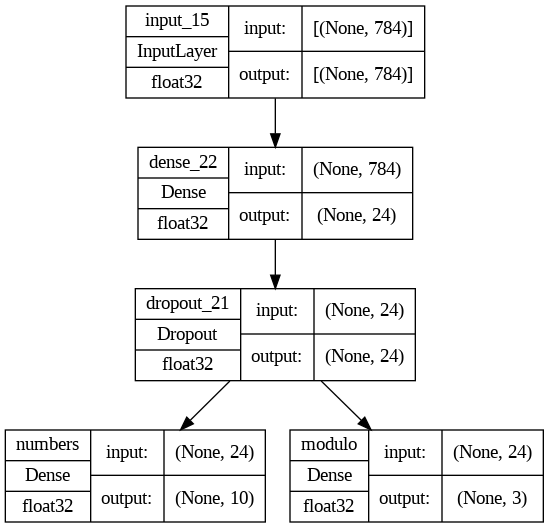

In [ ]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True,
           show_dtype=True)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y2_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y2_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 3s 4ms/step - loss: 0.1958 - accuracy: 0.9347 - val_loss: 0.1436 - val_accuracy: 0.9546
Epoch 2/2
750/750 [==============================] - 3s 4ms/step - loss: 0.1932 - accuracy: 0.9357 - val_loss: 0.1464 - val_accuracy: 0.9502
313/313 - 1s - loss: 0.1480 - accuracy: 0.9531 - 588ms/epoch - 2ms/step
Test loss: 0.14802242815494537
Test accuracy: 0.9531000256538391


## Zadanie do wykonania - budowa modelu dla drugiego zagadnienia

Na podstawie powyższego kodu dla modelu sieci klasyfikującej do 10 klas należy:
- przygotować **model jednozadaniowy**, realizujący klasyfikację zbioru MNIST do klas 0, 1 i 2 w zależności od wyniku `x % 3`. `x_train, x_test` pozostają bez zmian, a klasy `y2_train, y2_test`.
- maksymalnie uprościć architekturę zmniejszając liczbę warstw i ich rozmiar (szerokość), zachowując odpowiednio **wysokie `accuracy`**
- pomierzyć czasy działania - nauki i ewaluacji

## Budowa modelu wielozadaniowego

Biblioteka `keras` oferuje intuicyjny sposób budowy architektury sieci w formie grafu, w którym możliwe są połączenia wyjść z wielu warstw, rozdzielenia wyjść i inne. Szczegóły dostępne są w dokumentacji: https://keras.io/guides/functional_api/

Poniżej zaproponowany jest model sieci jednocześnie klasyfikującej cyfry do klas 0-9 oraz do klas 0, 1, 2.

Należy zwrócić uwagę na obiekt nazwany 'split', tj. wyjście pierwszej warstwy dense i na sposób w jaki użyty jest jako wejście do dwóch różnych gałęzi. Prześledzić należy kod oraz wykreślony graf.

(jeśli samodzielnie nie nadano nazw `name="nazwa"` to stosowane są domyślne, rozróżniane inkrementowanym numerem)


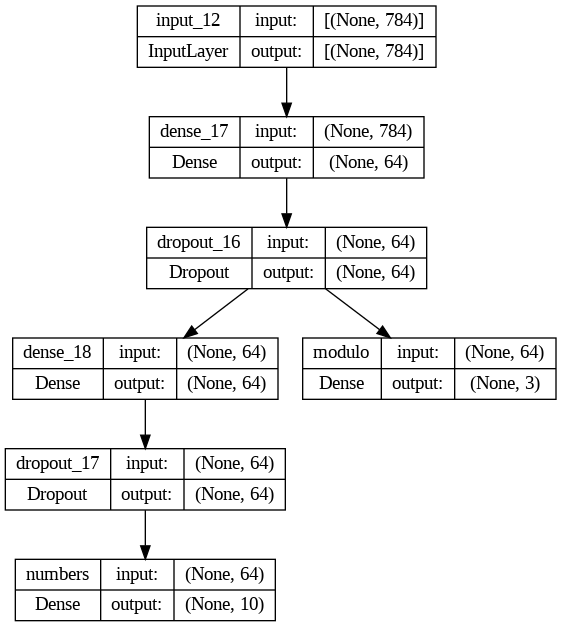

In [ ]:
inputs = keras.Input(shape=(784,))

x = layers.Dense(64, activation="relu")(inputs)
split = layers.Dropout(0.2)(x)

x10 = layers.Dense(64, activation="relu")(split)
x10 = layers.Dropout(0.2)(x10)


outputs10 = layers.Dense(10, name="numbers")(x10)

outputs3 = layers.Dense(3, name="modulo")(split)

model = keras.Model(inputs=inputs,
                    outputs=[outputs10, outputs3],)

plot_model(model,show_shapes=True)

Model należy skompilować, definiując `loss` i `loss_weights` jako dwuelementowe słowniki Pythona o kluczach tożsamych z nazwami warstw wyjściowych.

In [ ]:
model.compile(
    loss={
        "numbers": keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        "modulo": keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    },
    loss_weights={"numbers": 1.0, "modulo": 0.5},
    optimizer=keras.optimizers.RMSprop(1e-3),
    metrics=["accuracy"]
)

Model zostaje wyuczony. Należy zwrócić uwagę na argument `y`, który jest wektorem dwóch wyjść.

In [ ]:
model.fit(x=x_train,
          #y={"numbers": y_train, "modulo": y2_train},
          y=[y_train, y2_train],
          batch_size=64, epochs=2, validation_split=0.2
          )

Epoch 1/2
750/750 [==============================] - 6s 6ms/step - loss: 0.6796 - numbers_loss: 0.4968 - modulo_loss: 0.3656 - numbers_accuracy: 0.8499 - modulo_accuracy: 0.8599 - val_loss: 0.2909 - val_numbers_loss: 0.2030 - val_modulo_loss: 0.1757 - val_numbers_accuracy: 0.9398 - val_modulo_accuracy: 0.9428
Epoch 2/2
750/750 [==============================] - 4s 5ms/step - loss: 0.3485 - numbers_loss: 0.2502 - modulo_loss: 0.1966 - numbers_accuracy: 0.9262 - modulo_accuracy: 0.9325 - val_loss: 0.2129 - val_numbers_loss: 0.1499 - val_modulo_loss: 0.1261 - val_numbers_accuracy: 0.9570 - val_modulo_accuracy: 0.9589


# Zadanie do wykonania - Ocena działania modelu

Podobnie jak w etapie uczenia, w trakcie ewaluacji modelu należy podać wektor dwóch odpowiedzi y_test i y2_test. Zwrócić należy uwagę na otrzymany wynik - wektor wartości całkowitego loss, loss zagadnienia pierwszego, loss zagadnienia drugiego, accuracy pierwszego i accuracy drugiego.

Ewaluację należy powtórzyć kilkukrotnie odnotowując czasy.
Czy czasy są dłuższe/krótsze od sumy czasów działania modeli jednozadaniowych?




In [ ]:
score = model.evaluate(x_test, [y_test, y2_test])
print(score)
print('Test loss dla cyfr:', score[1])
print('Test accuracy dla cyfr:', score[3])
print('Test loss dla mod3:', score[2])
print('Test accuracy dla mod3:', score[4])

313/313 [==============================] - 1s 3ms/step - loss: 0.2373 - numbers_loss: 0.1651 - modulo_loss: 0.1443 - numbers_accuracy: 0.9498 - modulo_accuracy: 0.9515
[0.23726943135261536, 0.1651267260313034, 0.14428496360778809, 0.9498000144958496, 0.9514999985694885]
Test loss dla cyfr: 0.1651267260313034
Test accuracy dla cyfr: 0.9498000144958496
Test loss dla mod3: 0.14428496360778809
Test accuracy dla mod3: 0.9514999985694885


# Zadanie do wykonania - optymalizacja modelu wielozadaniowego

Należy skopiować kod budowy modelu, kompilacji, uczenia i ewaluacji do komórki poniżej. Modyfikować architekturę sieci, miejsce rozgałęzienia, szerokości warstw, liczbę warstw i utworzyć model o mniejszej liczbie wag, realizujący oba zadania z wysokim accuracy.

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 784)]                0         []                            
                                                                                                  
 dense_24 (Dense)            (None, 24)                   18840     ['input_17[0][0]']            
                                                                                                  
 dropout_23 (Dropout)        (None, 24)                   0         ['dense_24[0][0]']            
                                                                                                  
 numbers (Dense)             (None, 10)                   250       ['dropout_23[0][0]']          
                                                                                            

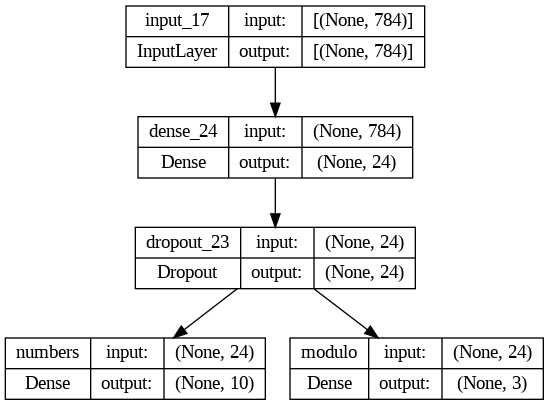

In [ ]:
inputs = keras.Input(shape=(784,))

x = layers.Dense(24, activation="relu")(inputs)
split = layers.Dropout(0.2)(x)

# x10 = layers.Dense(16, activation="relu")(split)
# x10 = layers.Dropout(0.2)(x10)


outputs10 = layers.Dense(10, name="numbers")(split)

outputs3 = layers.Dense(3, name="modulo")(split)

model = keras.Model(inputs=inputs,
                    outputs=[outputs10, outputs3],)

model.summary()

plot_model(model,show_shapes=True)

In [ ]:
model.compile(
    loss={
        "numbers": keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        "modulo": keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    },
    loss_weights={"numbers": 1.0, "modulo": 0.5},
    optimizer=keras.optimizers.RMSprop(1e-3),
    metrics=["accuracy"]
)

model.fit(x=x_train,
          #y={"numbers": y_train, "modulo": y2_train},
          y=[y_train, y2_train],
          batch_size=64, epochs=2, validation_split=0.2
          )

Epoch 1/2
750/750 [==============================] - 4s 5ms/step - loss: 0.4296 - numbers_loss: 0.3064 - modulo_loss: 0.2462 - numbers_accuracy: 0.9096 - modulo_accuracy: 0.9104 - val_loss: 0.2884 - val_numbers_loss: 0.2087 - val_modulo_loss: 0.1594 - val_numbers_accuracy: 0.9395 - val_modulo_accuracy: 0.9441
Epoch 2/2
750/750 [==============================] - 4s 5ms/step - loss: 0.4138 - numbers_loss: 0.2945 - modulo_loss: 0.2387 - numbers_accuracy: 0.9116 - modulo_accuracy: 0.9144 - val_loss: 0.2717 - val_numbers_loss: 0.1963 - val_modulo_loss: 0.1508 - val_numbers_accuracy: 0.9440 - val_modulo_accuracy: 0.9468


In [ ]:
score = model.evaluate(x_test, [y_test, y2_test])
print(score)
print('Test loss dla cyfr:', score[1])
print('Test accuracy dla cyfr:', score[3])
print('Test loss dla mod3:', score[2])
print('Test accuracy dla mod3:', score[4])

ValueError: ignored

# Sieci splotowe

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization

## Wczytanie zbioru danych

Dla sieci splotowych wejściem powinny być tensory - macierze wielowymiarowe, dlatego nie ma potrzeby zmiany kształtu. Jednakże konieczne jest podanie wprost informacji o czwartym wymiarze - liczbie kanałów koloru. W tym wypadku wymiary tensora to `60 000, 28, 28, 1`.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

W poniższym przykładzie zastosowane jest kodowanie one-hot (one versus all).

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Poniżej jako argumenty podawane są nienazwane parametry, jednakże zachowana jest kolejność:

- pierwszy argument - liczba filtrów,
- drugi argument - rozmiar kwadratowego kernela, np. 3 oznacza 3x3.

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          36928     
                                                          

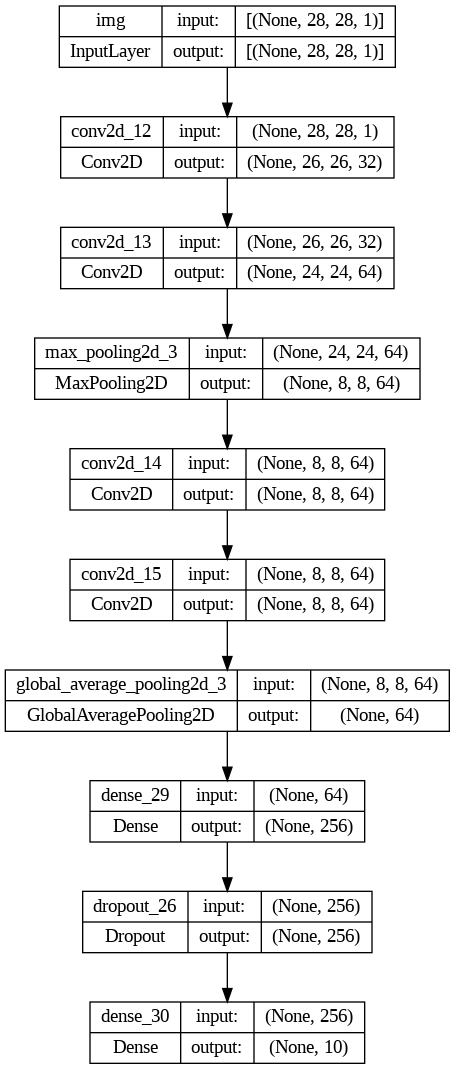

In [ ]:
inputs = keras.Input(shape=(28, 28, 1), name="img")
# layers.Conv2D - własne zadanie: sprawdzić dokumentację przez użycie 'tooltip' i autouzupełniania
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs)
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)

model.fit(X_train, Y_train, batch_size=64, epochs=3, validation_split=0.2)

Epoch 1/3
750/750 [==============================] - 7s 8ms/step - loss: 0.8987 - acc: 0.6881 - val_loss: 0.2153 - val_acc: 0.9358
Epoch 2/3
750/750 [==============================] - 5s 7ms/step - loss: 0.1936 - acc: 0.9426 - val_loss: 0.0832 - val_acc: 0.9751
Epoch 3/3
750/750 [==============================] - 7s 9ms/step - loss: 0.1133 - acc: 0.9657 - val_loss: 0.0668 - val_acc: 0.9817


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0418 - acc: 0.9856
Test score: 0.04179104045033455
Test accuracy: 0.9855999946594238


# Zadanie do wykonania

Należy skopiować cały kod związany z budowaniem, nauką i ewaluacją sieci splotowej i **zmodyfikować go do działania wielozadaniowego**. Wykorzystać można jako drugie zadanie określone wcześniej trywialne klasy `x mod 3`.

Model należy wyświetlić `plot_model(model)`.
Spróbować uprościć uzyskany model, zmniejszając liczbę filtrów i warstw.

Na koniec należy przebadać i opisać działanie wykonanych wariantów.

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_27 (Conv2D)          (None, 26, 26, 32)           320       ['img[0][0]']                 
                                                                                                  
 conv2d_28 (Conv2D)          (None, 24, 24, 64)           18496     ['conv2d_27[0][0]']           
                                                                                                  
 max_pooling2d_8 (MaxPoolin  (None, 8, 8, 64)             0         ['conv2d_28[0][0]']           
 g2D)                                                                                      

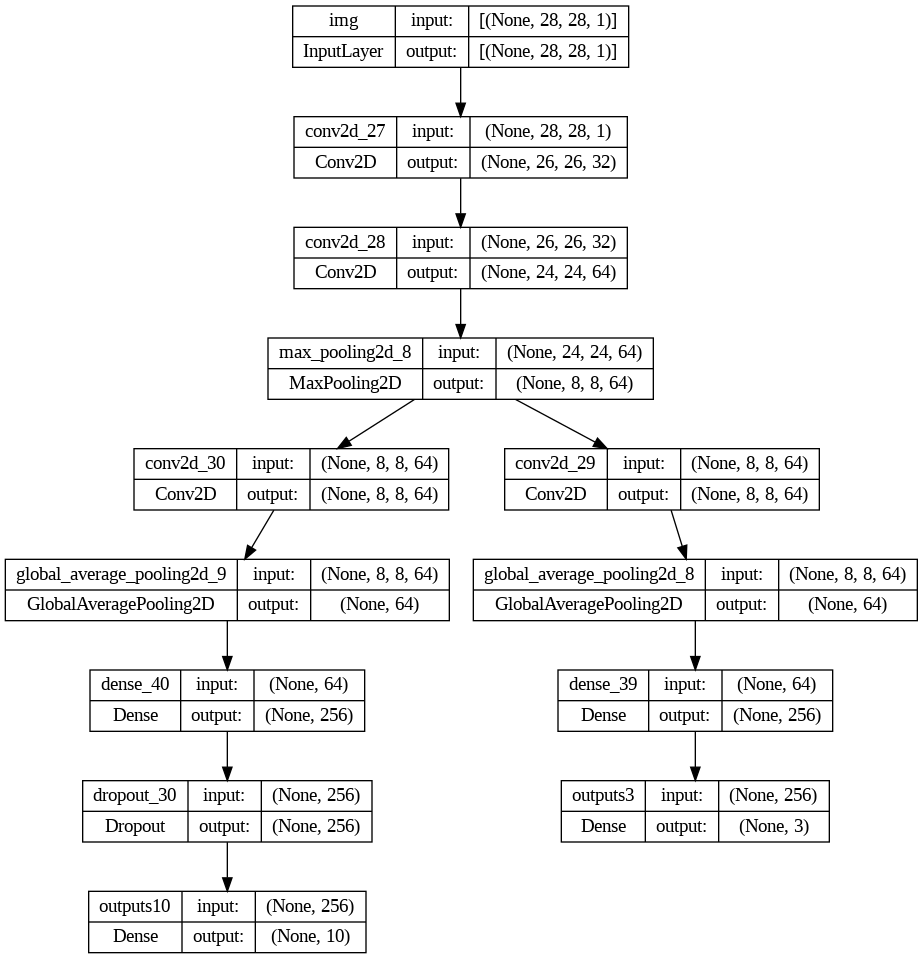

In [ ]:
inputs = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
split = layers.MaxPooling2D(3)(x)

x3 = layers.Conv2D(64, 3, activation="relu", padding="same")(split)
x3 = layers.GlobalAveragePooling2D()(x3)
x3 = layers.Dense(256, activation="relu")(x3)
outputs3 = layers.Dense(3, name='outputs3')(x3)

x10 = layers.Conv2D(64, 3, activation="relu", padding="same")(split)
x10 = layers.GlobalAveragePooling2D()(x10)

x10 = layers.Dense(256, activation="relu")(x10)
x10 = layers.Dropout(0.5)(x10)
outputs10 = layers.Dense(10, name='outputs10')(x10)

model = keras.Model(inputs=inputs, outputs=[outputs10, outputs3])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    loss={
        "outputs3": keras.losses.CategoricalCrossentropy(from_logits=True),
        "outputs10": keras.losses.CategoricalCrossentropy(from_logits=True)
    },
    loss_weights={"outputs10": 1.0, "outputs3": 0.5},
    optimizer=keras.optimizers.RMSprop(1e-3),
    metrics=["acc"]
)

y2_train_conv = np_utils.to_categorical(y2_train, 3)
y2_test_conv = np_utils.to_categorical(y2_test, 3)

model.fit(x=X_train, y=[Y_train, y2_train_conv], batch_size=64, epochs=3, validation_split=0.2)

(60000, 28, 28, 1)
(60000, 10)
(60000, 3)
Epoch 1/3
750/750 [==============================] - 8s 9ms/step - loss: 1.4711 - outputs10_loss: 1.1424 - outputs3_loss: 0.6574 - outputs10_acc: 0.5983 - outputs3_acc: 0.6789 - val_loss: 0.6241 - val_outputs10_loss: 0.3783 - val_outputs3_loss: 0.4914 - val_outputs10_acc: 0.8792 - val_outputs3_acc: 0.7618
Epoch 2/3
750/750 [==============================] - 6s 8ms/step - loss: 0.4368 - outputs10_loss: 0.3264 - outputs3_loss: 0.2207 - outputs10_acc: 0.8991 - outputs3_acc: 0.9187 - val_loss: 0.2200 - val_outputs10_loss: 0.1662 - val_outputs3_loss: 0.1074 - val_outputs10_acc: 0.9511 - val_outputs3_acc: 0.9618
Epoch 3/3
750/750 [==============================] - 6s 7ms/step - loss: 0.2439 - outputs10_loss: 0.1899 - outputs3_loss: 0.1079 - outputs10_acc: 0.9425 - outputs3_acc: 0.9631 - val_loss: 0.1375 - val_outputs10_loss: 0.1019 - val_outputs3_loss: 0.0713 - val_outputs10_acc: 0.9686 - val_outputs3_acc: 0.9747


In [ ]:
# score = model.evaluate(X_test, [Y_test, y2_test_conv])
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

score = model.evaluate(X_test, [Y_test, y2_test_conv])
print(score)
print('Test loss dla cyfr:', score[1])
print('Test accuracy dla cyfr:', score[3])
print('Test loss dla mod3:', score[2])
print('Test accuracy dla mod3:', score[4])

313/313 [==============================] - 1s 4ms/step - loss: 0.1296 - outputs10_loss: 0.0958 - outputs3_loss: 0.0676 - outputs10_acc: 0.9708 - outputs3_acc: 0.9750
[0.12958988547325134, 0.09579736739397049, 0.06758511811494827, 0.97079998254776, 0.9750000238418579]
Test loss dla cyfr: 0.09579736739397049
Test accuracy dla cyfr: 0.97079998254776
Test loss dla mod3: 0.06758511811494827
Test accuracy dla mod3: 0.9750000238418579


-----

<center><img src='https://drive.google.com/uc?id=1PioHCAlQTt8LWChoMysPErSOrxOfAW0R'></center>